# A RenderMan Example

First, we set up the two objects which render and create synth parameters respectively from the classes 'RenderEngine' and 'PatchGenerator'. I am working on Linux and therefore VSTs are shared objects - .so files. At the end I print out the plugins parameters so it is easy to see which parameter does what at which index.

In [41]:
import os
import yaml
# Important paths
lib_path = os.path.join('.', 'RenderMan', 'Builds', 'LinuxMakefile', 'build', 'librenderman.so')
vst_path = os.path.join('/', 'home', 'seawee1', '.vst', 'u-he', 'TripleCheese.64.so')

# Symlink RenderMan library to working directory before import
if not os.path.isfile('librenderman.so'):
    os.symlink(lib_path, os.path.join('.', 'librenderman.so'))
import librenderman as rm

# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

# Load the VST into the RenderEngine.
engine.load_plugin(vst_path)

# Create a patch generator. We can initialise it to generate the correct
# patches for a given synth by passing it a RenderEngine which has
# loaded a instance of the synthesiser. 
generator = rm.PatchGenerator(engine)

# We can also get a string of information about the
# available parameters.
print(engine.get_plugin_parameters_description())

  0: main: Output
  1: main: Active #LFOG
  2: main: Active #FXU1
  3: LFOG: Sync
  4: LFOG: Phase
  5: VCC: Active #VBR
  6: VCC: Active #CSO1
  7: VCC: Active #CSO2
  8: VCC: Active #CSO3
  9: VCC: Voices
 10: VCC: Voice Stack
 11: VCC: Mode
 12: VCC: Glide
 13: ENV1: Attack
 14: ENV1: Decay
 15: ENV1: Sustain
 16: ENV1: Fall - Rise
 17: ENV1: Release
 18: ENV1: Velocity
 19: ENV2: Attack
 20: ENV2: Decay
 21: ENV2: Sustain
 22: ENV2: Fall - Rise
 23: ENV2: Release
 24: ENV2: Velocity
 25: VBR: Sync
 26: VBR: Delay
 27: CSO1: Tune
 28: CSO1: Detune
 29: CSO1: Vibrato
 30: CSO1: Damp
 31: CSO1: DampModDepth
 32: CSO1: Volume
 33: CSO1: VolumeModSrc
 34: CSO1: VolumeModDepth
 35: CSO1: Pan
 36: CSO1: PanModSrc
 37: CSO1: PanModDepth
 38: CSO1: Tone
 39: CSO1: ToneMod
 40: CSO2: Tune
 41: CSO2: Detune
 42: CSO2: Vibrato
 43: CSO2: Damp
 44: CSO2: DampModDepth
 45: CSO2: Volume
 46: CSO2: VolumeModSrc
 47: CSO2: VolumeModDepth
 48: CSO2: Pan
 49: CSO2: PanModSrc
 50: CSO2: PanModDepth
 5

## Rendering Patches

In [51]:
# Get a random patch and set it.
new_patch = generator.get_random_patch()
engine.set_patch(new_patch)

# Set vibrato to 1. for all generators
overriden_parameters = [(29, 1.),(42, 1.),(55, 1.),]

# Loop through each tuple, unpack it and override the correct
# parameter with the correct value to prevent hanging notes.
for parameter in overriden_parameters:
    index, value = parameter
    engine.override_plugin_parameter(index, value)


# Settings to play a note and extract data from the synth.
midiNote = 70
midiVelocity = 127
noteLength = 3.0
renderLength = 5.0

# Render the data. 
engine.render_patch(midiNote, midiVelocity, noteLength, renderLength, True)

# Get the data. Note the audio is automattically made mono, no
# matter what channel size for ease of use.
audio = engine.get_audio_frames()
mfccs = engine.get_mfcc_frames()

# Get the patch and display it!
patch = engine.get_patch()

# The patch is just a list of tuples, one int for index
# and one float for the value. I've printed out the patch,
# note the overriden parameters are the correct ones!
for parameter in patch:
     # Unpack and print the parameter tuple.
    index, value = parameter
    print("Index: " + '{:3d}'.format(index) + " --- Value: " + str(value))

Index:   0 --- Value: 0.8081911206245422
Index:   1 --- Value: 0.37199994921684265
Index:   2 --- Value: 0.7953609228134155
Index:   3 --- Value: 0.46525949239730835
Index:   4 --- Value: 0.1866503357887268
Index:   5 --- Value: 0.0065884399227797985
Index:   6 --- Value: 0.27134478092193604
Index:   7 --- Value: 0.6057192087173462
Index:   8 --- Value: 0.9551610350608826
Index:   9 --- Value: 0.9101991057395935
Index:  10 --- Value: 0.6024592518806458
Index:  11 --- Value: 0.40307605266571045
Index:  12 --- Value: 0.26640552282333374
Index:  13 --- Value: 0.34031128883361816
Index:  14 --- Value: 0.15118178725242615
Index:  15 --- Value: 0.9034256339073181
Index:  16 --- Value: 0.8462557792663574
Index:  17 --- Value: 0.3072735071182251
Index:  18 --- Value: 0.08866235613822937
Index:  19 --- Value: 0.5224314332008362
Index:  20 --- Value: 0.3986855745315552
Index:  21 --- Value: 0.920126736164093
Index:  22 --- Value: 0.1860184222459793
Index:  23 --- Value: 0.7471761703491211
Index:

##Visualising Audio
We are not just limited to listening to audio, we can look at it too visually. We plot the amplitude over time by simply using matplotlib's plot function.

Text(0.5, 0, 'Time (frame count)')

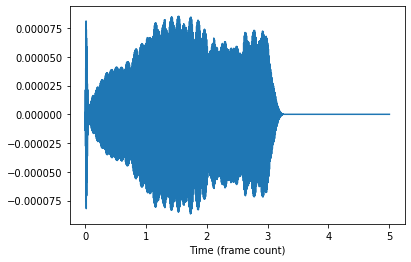

In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(np.linspace(0.0, len(audio)/sampleRate, len(audio)), audio)
plt.xlabel('Time (frame count)')

##Spectrograms
We can look at frequency over time by using specgram. The y-axis is the frequency, pass the samplerate as the 'Fs' argument to set the range correctly - remember the Nyquist frequency is half the sample rate! The X-axis is time. 

/home/seawee1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency')

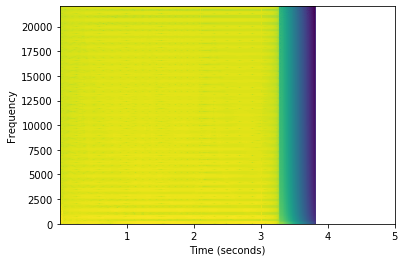

In [53]:
plt.specgram(audio, NFFT=512, Fs=sampleRate, noverlap=256)

# Plot a spectrogram
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

##Playing The Rendered Audio

If working in a notebook, IPython supplies a easy way to load a mono list of samples into a HTML audio tag. If you aren't using IPython then you can use RenderMan to write to a wav, or use a python library like librosa to write to a wav. 

In [54]:
from IPython.display import Audio

Audio(audio, rate=sampleRate, autoplay=True)